#Tools and Techniques for Combatting Cyber Radicalisation
by Matthew Redrup 

##**Prototype 1** Classification Model for classifying Tweets as from Republican or Democrat representatives

Code is adapted from the fast.ai video tutorial by Zachary Mueller (2020) available on YouTube here https://www.youtube.com/watch?v=hfcqvWmQ1Jw The code is not published online.

In [1]:
# install libraries needed - This will also mount the gdrive where the data set is stored
!pip install -Uqq fastbook
!pip install fastdot
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai import *
from fastai.tabular.all import *
from fastai.text.all import *
from IPython.display import display,HTML
from sklearn.model_selection import train_test_split
from fastai.text.all import *
from fastdot import *

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 186 kB 64.5 MB/s 
     |████████████████████████████████| 46 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 49.8 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 51 kB 419 kB/s 
Mounted at /content/gdrive


In [2]:
# Move to location of the data set 
%cd "/content/gdrive/MyDrive/Colab Notebooks/"

/content/gdrive/MyDrive/Colab Notebooks


In [3]:
%cp -r 'ProjectFiles' /content/sample_data

In [4]:
path = Path('ProjectFiles')

In [5]:
# Read the data set and convert into a data frame
df = pd.read_csv('CleanSenateTweets.csv')
df.head()

,Unnamed: 0,Office,Name,Party,TwitterHandle,username,tweet,name
0,0,U.S. Senate Alabama,Richard Shelby,Republican,@SenShelby,SenShelby,"Sending condolences to the family, friends, &amp; colleagues of Snr. Officer George Gonzalez who lost his life in the line of duty on Tuesday. Officer Gonzalez served in the @PFPAOfficial for the past three years, and before that overseas in Iraq. His sacrifice will not be forgotten.",Richard Shelby
1,1,U.S. Senate Alabama,Richard Shelby,Republican,@SenShelby,SenShelby,Today we celebrate 231 years of the @USCG! The men and women of the Coast Guard play a large role in defending and protecting Alabama's shores and beyond. I am grateful for their dedicated service and commitment to our safety. #SemperParatus #AlwaysReady,Richard Shelby
2,2,U.S. Senate Alabama,Richard Shelby,Republican,@SenShelby,SenShelby,"Today, my colleagues and I on the Appropriations Committee advanced three important bills that contain funding for #Alabama priorities, including resources for water infrastructure projects, farmers in rural communities, and assistance for our veterans. https://t.co/7lExGFyF0a",Richard Shelby
3,3,U.S. Senate Alabama,Richard Shelby,Republican,@SenShelby,SenShelby,".@NSF has awarded @AuburnU $10M to lead the Southeastern region in a collaborative research project to increase the number of disabled students who complete STEM degrees and enter the respective workforce. This is a national initiative, and I am proud to see Auburn at the helm.",Richard Shelby
4,4,U.S. Senate Alabama,Richard Shelby,Republican,@SenShelby,SenShelby,"@NSF has awarded @AuburnU $10M to lead the Southeastern region in a collaborative research project to increase the number of disabled students who complete STEM degrees and enter the respective workforce. This is a national initiative, and I am proud to see Auburn at the helm.",Richard Shelby


In [6]:
# Tidy the data set and add random split into training and validation set
cat_names = ['Office', 'Name', 'TwitterHandle', 'username', 'tweet', 'name']
cont_names = []
procs = [Categorify, FillMissing, Normalize]
y_names = 'Party'
splits = RandomSplitter()(range_of(df))

In [7]:
to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=y_names, splits=splits)

In [8]:
to.train.xs.iloc[:3]

,Office,Name,TwitterHandle,username,tweet,name
2868,9,78,62,63,943,76
5914,18,44,83,84,17149,42
4482,14,64,112,113,2967,125


In [9]:
to.train.ys.iloc[:3]

,Party
2868,2
5914,2
4482,2


In [10]:
from IPython.utils import io as io_p

In [11]:
def get_b_w(t):
    best = round(t.best*1000, 2)
    worst = round(t.worst*1000, 2)
    return best, worst

In [12]:
def get_avg(a, b, dl):
    best = round(a/len(dl), 2)
    worst = round(b/len(dl), 2)
    return best, worst

In [13]:
dls = to.dataloaders(bs=128, device='cpu')

In [14]:
# Redirect where print goes to for easier reading of output
old_stdout = sys.stdout
new_stdout = io.StringIO()
sys.stdout = new_stdout
print(f'Type = NumPy\nDevice = {dls.device}\nBatch Size = {dls.bs}') # Print device and batch size
with io_p.capture_output() as captured: # Hide %timeit output
    t = %timeit -o next(iter(dls.train)) # Time getting first batch
    best, worst = get_b_w(t) # Round
print(f'First Batch:\n\t`train`: Best: {best}ms, Worst: {worst}ms')
with io_p.capture_output() as captured:
    t = %timeit -o next(iter(dls.valid))
    best, worst = get_b_w(t)
print(f'\t`valid`: Best: {best}ms, Worst: {worst}ms')
with io_p.capture_output() as captured:
    t = %timeit -o for _ in dls.train: pass # Time going over all batches
    best, worst = get_b_w(t)
print(f'All Batches:\n\t`train`: Best: {best}ms, Worst: {worst}ms')
b_t,w_t = get_avg(best, worst, dls.train)
with io_p.capture_output() as captured:
    t = %timeit -o for _ in dls.valid: pass
    best, worst = get_b_w(t)
print(f'\t`valid`: Best: {best}ms, Worst: {worst}ms')
b_v,w_v = get_avg(best, worst, dls.valid)
print(f'Average Per Batch:\n\t`train`: Best: {b_t}ms/batch, Worst: {w_t}ms/batch')
print(f'\t`valid`: Best: {b_v}ms/batch, Worst: {w_v}ms/batch')
out = new_stdout.getvalue()
sys.stdout = old_stdout

In [15]:
print(out)

Type = NumPy
Device = cpu
Batch Size = 128
First Batch:
	`train`: Best: 13.59ms, Worst: 35.75ms
	`valid`: Best: 2.56ms, Worst: 2.66ms
All Batches:
	`train`: Best: 275.0ms, Worst: 291.24ms
	`valid`: Best: 65.06ms, Worst: 68.01ms
Average Per Batch:
	`train`: Best: 2.48ms/batch, Worst: 2.62ms/batch
	`valid`: Best: 2.32ms/batch, Worst: 2.43ms/batch



In [16]:
dls.device = 'cuda'

In [17]:
# Redirect where print goes to
old_stdout = sys.stdout
new_stdout = io.StringIO()
sys.stdout = new_stdout
print(f'Type = fastai\nDevice = {dls.device}\nBatch Size = {dls.bs}') # Print device and batch size
with io_p.capture_output() as captured: # Hide %timeit output
    t = %timeit -o next(iter(dls.train)) # Time getting first batch
    best, worst = get_b_w(t) # Round
print(f'First Batch:\n\t`train`: Best: {best}ms, Worst: {worst}ms')
with io_p.capture_output() as captured:
    t = %timeit -o next(iter(dls.valid))
    best, worst = get_b_w(t)
print(f'\t`valid`: Best: {best}ms, Worst: {worst}ms')
with io_p.capture_output() as captured:
    t = %timeit -o for _ in dls.train: pass # Time going over all batches
    best, worst = get_b_w(t)
print(f'All Batches:\n\t`train`: Best: {best}ms, Worst: {worst}ms')
b_t,w_t = get_avg(best, worst, dls.train)
with io_p.capture_output() as captured:
    t = %timeit -o for _ in dls.valid: pass
    best, worst = get_b_w(t)
print(f'\t`valid`: Best: {best}ms, Worst: {worst}ms')
b_v,w_v = get_avg(best, worst, dls.valid)
print(f'Average Per Batch:\n\t`train`: Best: {b_t}ms/batch, Worst: {w_t}ms/batch')
print(f'\t`valid`: Best: {b_v}ms/batch, Worst: {w_v}ms/batch')
out = new_stdout.getvalue()
sys.stdout = old_stdout

In [18]:
print(out)

Type = fastai
Device = cuda
Batch Size = 128
First Batch:
	`train`: Best: 13.66ms, Worst: 18.85ms
	`valid`: Best: 2.55ms, Worst: 3.16ms
All Batches:
	`train`: Best: 271.57ms, Worst: 287.83ms
	`valid`: Best: 66.18ms, Worst: 68.61ms
Average Per Batch:
	`train`: Best: 2.45ms/batch, Worst: 2.59ms/batch
	`valid`: Best: 2.36ms/batch, Worst: 2.45ms/batch



###Tokenization
The data is tokenized to turn it into a form that is easier for the engine to process when training the language model. This will normalize words in case such as where they have been capitolized at the start of a sentence. 

In [19]:
# Tokenize the text for training the language model
dls = TextDataLoaders.from_df(df, text_col='tweet', label_col='Party', seed=1)
dls.show_batch(max_n=5)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,xxbos xxmaj major countries that guarantee new parents some form of paid leave : 🇦 🇺 🇦 🇹 🇧 🇪 🇨 🇦 🇨 🇱 🇨 🇿 🇩 🇰 🇪 🇪 🇫 🇮 🇫 🇷 🇩 🇪 🇬 🇷 🇭 🇺 🇮 🇸 🇮 🇪 🇮 🇱 🇮 🇹 xxunk 🇵 🇰 🇷 🇱 xxunk 🇱 🇹 🇱 🇺 xxunk xxunk 🇳 🇱 🇳 🇿 🇳 🇴 🇵 🇱 🇵 🇹 🇸 🇰 🇸 🇮 🇪 🇸 🇸 🇪 🇨 🇭 🇹 🇷 🇬 🇧 xxmaj major countries that will finally guarantee paid leave for new parents when we pass our reconciliation bill : 🇺 🇸,Independent
1,xxbos xxmaj resources for folks in crisis : xxmaj national xxmaj suicide xxmaj prevention xxmaj lifeline : 1 - 800 - 273 - 8255 xxmaj en xxmaj español : xxunk xxrep 3 8 xxunk - xxunk xxmaj for xxmaj xxunk & & xxmaj hard of xxmaj hearing : 1 - 800 - 273 - 8255 ( xxunk users : use your preferred relay service or dial xxunk then 1 - 800 - 273 - 8255 ) xxmaj crisis xxmaj text xxmaj line : xxmaj text xxup home to 741741,Democratic
2,xxbos xxmaj join me in cheering on the xxmaj kansans competing in the # olympicgames ! ▁ ⚾ xxunk xxmaj xxunk of xxmaj gardner : xxmaj july 30 @ 5 am xxup ct xxunk derrick xxmaj xxunk of xxmaj xxunk : xxmaj july 27 @ xxunk xxup ct ⚽ xxunk xxmaj xxunk of xxmaj xxunk : xxmaj july 24 @ 6 am xxup ct 🥎 xxunk xxmaj stewart of xxmaj wichita : xxmaj july 24 @ xxunk xxup ct https : / / t.co / xxunk,Republican
3,"xxbos xxmaj the world has lost a statesman . xxmaj as a xxunk & & xxmaj marine , xxmaj secretary of the xxmaj navy , & & chairman of the xxmaj armed xxmaj services xxmaj committee , xxmaj sen . xxmaj warner of xxmaj virginia was a champion for our men & & women in uniform . xxmaj gayle & & i send our condolences & & prayers to his family & & many friends today . https : / / t.co / xxunk",Republican
4,"xxbos xxmaj today 's the day , xxmaj new xxmaj hampshire . xxmaj if you live in the xxmaj bow & & xxmaj xxunk area , do n't forget to get out and vote for xxmaj muriel xxmaj hall for xxup nh xxmaj state xxmaj rep . xxmaj we need xxmaj muriel in the xxmaj state xxmaj house , fighting for nh 's priorities . xxmaj find your local polling place here ⬇ ️ # nhpolitics https : / / t.co / xxunk",Democratic


In [20]:
# Batch data for processing
data_lm = TextDataLoaders.from_csv(path, 'CleanSenateTweets.csv', text_col='tweet', is_lm=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [21]:
data_lm.show_batch()

,text,text_
0,"xxbos xxmaj thank you to xxunk & & xxunk ’s efforts to support & & restore xxmaj xxunk xxmaj xxunk xxmaj wildlife xxmaj area , which includes a # xxup xxunk grant of $ 1 million and increased xxunk habitat to benefit xxunk & & south central xxmaj kansas . xxbos i never would have xxunk a time in xxmaj america when supporting the aspirations of the xxmaj cuban people against a","xxmaj thank you to xxunk & & xxunk ’s efforts to support & & restore xxmaj xxunk xxmaj xxunk xxmaj wildlife xxmaj area , which includes a # xxup xxunk grant of $ 1 million and increased xxunk habitat to benefit xxunk & & south central xxmaj kansas . xxbos i never would have xxunk a time in xxmaj america when supporting the aspirations of the xxmaj cuban people against a xxunk"
1,"– speaks at xxunk on the xxmaj violence xxmaj against xxmaj women xxmaj act https : / / t.co / xxunk xxbos xxmaj we must ensure our veterans , including those suffering from the invisible wounds of war , can access the benefits they ’ve earned . i secured a commitment from a key xxmaj department of xxmaj defense nominee to improve implementation of my bipartisan xxmaj fairness for xxmaj veterans xxmaj","speaks at xxunk on the xxmaj violence xxmaj against xxmaj women xxmaj act https : / / t.co / xxunk xxbos xxmaj we must ensure our veterans , including those suffering from the invisible wounds of war , can access the benefits they ’ve earned . i secured a commitment from a key xxmaj department of xxmaj defense nominee to improve implementation of my bipartisan xxmaj fairness for xxmaj veterans xxmaj act"
2,"reminder of the toughest decision we have to make as representatives – sending our brave young men and women into harms way . xxbos xxmaj more than one year into this pandemic , nurses and health care workers continue to serve on the very front lines . xxmaj we owe them our gratitude today and every day . # nationalnursesday xxbos xxmaj thanks to xxunk run and heavily taxed states like xxup","of the toughest decision we have to make as representatives – sending our brave young men and women into harms way . xxbos xxmaj more than one year into this pandemic , nurses and health care workers continue to serve on the very front lines . xxmaj we owe them our gratitude today and every day . # nationalnursesday xxbos xxmaj thanks to xxunk run and heavily taxed states like xxup ny"
3,"southern border , and the xxmaj democrats ’ reckless # taxandspendspree https : / / t.co / xxunk xxbos xxmaj my father was a xxunk - xxunk on a xxup xxunk , and i never forgot the lesson of honoring our veterans and active duty service members . xxmaj for all the brave men and women who serve , we thank you . # xxunk https : / / t.co / xxunk","border , and the xxmaj democrats ’ reckless # taxandspendspree https : / / t.co / xxunk xxbos xxmaj my father was a xxunk - xxunk on a xxup xxunk , and i never forgot the lesson of honoring our veterans and active duty service members . xxmaj for all the brave men and women who serve , we thank you . # xxunk https : / / t.co / xxunk xxbos"
4,"xxup icymi : xxmaj president xxmaj trump has endorsed me for re - election to the xxmaj senate . i worked with him to advance an agenda that put xxmaj arkansas and our country first , and xxmaj i ’ll continue to do that as your xxmaj senator . xxmaj i ’m grateful for his support . # arpx https : / / t.co / xxunk xxbos xxmaj talked to xxmaj school","icymi : xxmaj president xxmaj trump has endorsed me for re - election to the xxmaj senate . i worked with him to advance an agenda that put xxmaj arkansas and our country first , and xxmaj i ’ll continue to do that as your xxmaj senator . xxmaj i ’m grateful for his support . # arpx https : / / t.co / xxunk xxbos xxmaj talked to xxmaj school xxmaj"
5,"xxbos xxmaj please join me today at xxunk to celebrate # xxunk & & xxunk 's 20th anniversary . xxmaj we 'll be discussing some of the barriers that have been broken , progress that 's been made , & & challenges ahead as

###Numericalization
The data set is numericalised to create a vocabulary for training the language model.

In [22]:
# Numericalization
data_lm.vocab[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxrep',
 'xxwrep',
 'xxup',
 'xxmaj',
 '/']

In [23]:
data_lm.numericalize

Numericalize:
encodes: (object,object) -> encodes
decodes: (object,object) -> decodes

In [24]:
data_lm.tokenizer

Tokenizer:
encodes: (Path,object) -> encodes
(str,object) -> encodes
decodes: (object,object) -> decodes

In [25]:
data_lm.rules

[<function fastai.text.core.fix_html>,
 <function fastai.text.core.replace_rep>,
 <function fastai.text.core.replace_wrep>,
 <function fastai.text.core.spec_add_spaces>,
 <function fastai.text.core.rm_useless_spaces>,
 <function fastai.text.core.replace_all_caps>,
 <function fastai.text.core.replace_maj>,
 <function fastai.text.core.lowercase>]

In [26]:
data_lm.vocab[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxrep',
 'xxwrep',
 'xxup',
 'xxmaj',
 '/']

In [27]:
data_lm.o2i.items()

dict_items([('xxunk', 0), ('xxpad', 1), ('xxbos', 2), ('xxeos', 3), ('xxfld', 4), ('xxrep', 5), ('xxwrep', 6), ('xxup', 7), ('xxmaj', 8), ('/', 9), ('.', 10), ('the', 11), ('to', 12), (',', 13), ('and', 14), (':', 15), ('t.co', 16), ('https', 17), ('of', 18), ('in', 19), ('a', 20), ('for', 21), ('&', 22), ('is', 23), ('i', 24), ('our', 25), ('we', 26), ('#', 27), ('this', 28), ('on', 29), ('’s', 30), ('that', 31), ('it', 32), ('!', 33), ('-', 34), ('with', 35), ('are', 36), ('you', 37), ('have', 38), ('will', 39), ("'s", 40), ('be', 41), ('my', 42), ('their', 43), ('at', 44), ('as', 45), ('from', 46), ('more', 47), ('today', 48), ('all', 49), ('they', 50), ('not', 51), ('by', 52), ('your', 53), ('has', 54), ('who', 55), ('—', 56), ('can', 57), ('people', 58), ('senate', 59), ('an', 60), ('was', 61), ('get', 62), ('do', 63), ('need', 64), ('about', 65), ('american', 66), ('help', 67), ('act', 68), ('make', 69), ('work', 70), ('n’t', 71), ('biden', 72), ('up', 73), ('but', 74), ('time', 

In [28]:
tweet_lm = DataBlock(blocks=TextBlock.from_df('tweet', is_lm=True),
                     get_x=ColReader('text'),
                     splitter=RandomSplitter(0.1))

In [29]:
dls = tweet_lm.dataloaders(df, bs=64, seq_len=72)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [30]:
dls.show_batch(max_n=3)

,text,text_
0,xxbos i guess the face shield mandate was lifted shortly after he landed https : / / t.co / xxunk xxbos xxmaj from the @washingtonpost : “ border apprehensions have risen every month since xxmaj president xxmaj biden took office . ” https : / / t.co / xxunk xxbos xxmaj the xxmaj supreme xxmaj court xxunk arguments today in a lawsuit that could overturn the xxmaj affordable xxmaj care xxmaj act,i guess the face shield mandate was lifted shortly after he landed https : / / t.co / xxunk xxbos xxmaj from the @washingtonpost : “ border apprehensions have risen every month since xxmaj president xxmaj biden took office . ” https : / / t.co / xxunk xxbos xxmaj the xxmaj supreme xxmaj court xxunk arguments today in a lawsuit that could overturn the xxmaj affordable xxmaj care xxmaj act .
1,marta to better balance all the sources of revenue to maximize the benefits to our customers . ” xxbos xxmaj the practice of surprise medical xxunk needs to end . xxmaj this has been especially damaging during xxup covid-19 when patients receive large unexpected bills weeks after they go to the emergency room . https : / / t.co / xxunk xxbos xxmaj mike was a quiet leader of the xxmaj senate,to better balance all the sources of revenue to maximize the benefits to our customers . ” xxbos xxmaj the practice of surprise medical xxunk needs to end . xxmaj this has been especially damaging during xxup covid-19 when patients receive large unexpected bills weeks after they go to the emergency room . https : / / t.co / xxunk xxbos xxmaj mike was a quiet leader of the xxmaj senate .
2,"a shortage of care workers exacerbated by low wages is leaving many without the assistance they need . xxmaj that 's why xxmaj i 'm supporting a bill that bolsters these services & & strengthens wages for workers . xxbos xxmaj the federal corn ethanol mandate no longer makes sense when better , lower - carbon alternatives exist . xxmaj corn ethanol xxunk little to no reductions in greenhouse gas emissions .","shortage of care workers exacerbated by low wages is leaving many without the assistance they need . xxmaj that 's why xxmaj i 'm supporting a bill that bolsters these services & & strengthens wages for workers . xxbos xxmaj the federal corn ethanol mandate no longer makes sense when better , lower - carbon alternatives exist . xxmaj corn ethanol xxunk little to no reductions in greenhouse gas emissions . xxbos"


###Training the Language model
After tokenizing and numeracalizing the data then converting it to batches it can be used with transfer learning to retrain the language model trained on the Wikipedia data set (the default fast.ai language model for LSTM) using our Twitter data set.

In [31]:
learn = language_model_learner(dls, AWD_LSTM, drop_mult=0.3)

In [32]:
learn = learn.to_fp16()

SuggestedLRs(valley=0.009120108559727669)

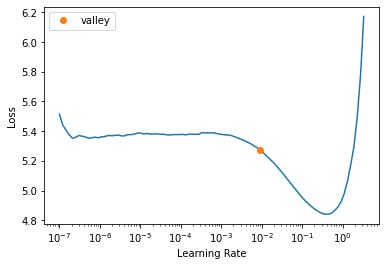

In [33]:
learn.lr_find()

In [34]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,time
0,3.509963,3.304518,00:39


In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,time
0,3.053182,3.070482,00:44


In [37]:
learn.save('fine_tuned')

Path('models/fine_tuned.pth')

In [38]:
text = 'I enjoyed visiting New York today because'
n_words = 20
n_sentences= 3

In [39]:
print('\n'.join(learn.predict(text, n_words) for _ in range(n_sentences)))

i enjoyed visiting New York today because you are restaurant employees . But the state is still crumbling , but we need to have an opportunity
i enjoyed visiting New York today because I ’ve gave you much more than ever , killing the big outdoors ! 🏞 and i had
i enjoyed visiting New York today because of the U.S . Red Women 's National Day of Pride louisiana Act


In [40]:
learn.save_encoder('fine_tuned_enc')

### Using the language model to create a text classifier
Having used transfer learning to train the langauge model with our twitter dataset, our new language model should now be better suited for addressing the classification problem on our data set.

In [42]:
# drop independents from data set
indexNames = df[ df['Party'] == 'Independent'].index
df.drop(indexNames, inplace=True)

In [43]:
len(df)

17498

In [44]:
blocks = (TextBlock.from_df('tweet', seq_len=dls.seq_len, vocab=dls.vocab), CategoryBlock())

In [45]:
tweet_clas = DataBlock(blocks=blocks,
                       get_x=ColReader('text'),
                       get_y=ColReader('Party'),
                       splitter=RandomSplitter(valid_pct=0.2, seed=42))

In [47]:
# Create the data loaders
dls = tweet_clas.dataloaders(df, bs=64)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [48]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj this week on xxmaj facebook xxmaj live , xxmaj i 'll be discussing latest xxup covid-19 information w / xxmaj dr . xxmaj maria xxup a. xxmaj xxunk , xxmaj health xxmaj officer for the xxmaj xxunk xxmaj county xxmaj health xxmaj xxunk & & xxmaj dr . xxmaj michelle xxup a. xxmaj xxunk , the interim xxmaj chief xxmaj medical xxmaj officer for xxup xxunk . xxmaj tune in xxmaj thursday , 7 / 15 at xxunk at https : / / t.co / xxunk https : / / t.co / xxunk",Democratic
1,"xxbos xxmaj today 's the day , xxmaj new xxmaj hampshire . xxmaj if you live in the xxmaj bow & & xxmaj xxunk area , do n't forget to get out and vote for xxmaj muriel xxmaj hall for xxup nh xxmaj state xxmaj rep . xxmaj we need xxmaj muriel in the xxmaj state xxmaj house , fighting for nh 's priorities . xxmaj find your local polling place here ⬇ ️ # nhpolitics https : / / t.co / xxunk",Democratic
2,"xxbos xxmaj we had a blast yesterday with thousands of our fellow xxmaj alaskans at one of the biggest rodeo events in xxmaj america — right here in xxmaj palmer , xxmaj alaska ! xxmaj xxunk of the best bull riders in the world are here , competing for a $ 15 , xxrep 3 0 xxunk . xxmaj there are still two days left to attend — xxunk miss it ! https : / / t.co / xxunk",Republican


In [49]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()
learn.load_encoder('fine_tuned_enc');

In [50]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.604520,0.568534,0.698200,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.556713,0.530621,0.726779,00:25
1,0.537609,0.496688,0.749643,00:25
2,0.497575,0.462421,0.774507,00:25
3,0.445480,0.430621,0.792798,00:25
4,0.408116,0.400252,0.806516,00:25
5,0.363738,0.388752,0.813661,00:25
6,0.342389,0.402768,0.811375,00:25
7,0.324581,0.388311,0.822807,00:25
8,0.301426,0.387007,0.822521,00:25
9,0.289230,0.386474,0.824235,00:25


In [51]:
learn.predict("Husband to @DrBiden, proud father and grandfather. Ready to build back better for all Americans. Official account is @POTUS")

('Republican', tensor(1), tensor([0.4749, 0.5251]))

In [52]:
learn.predict("Senate Democrats are now targeting people who have bought cryptocurrency.They think the tax code should treat the crypto ecosystem the same as it had been treating stockbrokers since 1954. That's not what I'd call progressive.")

('Republican', tensor(1), tensor([0.1482, 0.8518]))

In [53]:
learn.predict("Make no mistake: Access to high-speed Internet means access to opportunity.The Bipartisan Infrastructure bill will make a historic investment in our nation's broadband infrastructure.")

('Democratic', tensor(0), tensor([0.9872, 0.0128]))

In [54]:
learn.predict("Critical Race Theory is racism. ")

('Republican', tensor(1), tensor([0.0379, 0.9621]))